In [1]:

# Import libraries
import pandas as pd
import numpy as np
import pdb
import json
import re
import requests
import sys
import types

In [2]:

# Import libraries
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

In [3]:
#pd.read_csv('https://github.com/IBM/iot-predictive-analytics/blob/master/data/iot_sensor_dataset.csv')

import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/IBM/iot-predictive-analytics/master/data/iot_sensor_dataset.csv"
df_iotdata=pd.read_csv(url,error_bad_lines=False)
df_iotdata.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [4]:
X=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

y_target=df_iotdata['fail']
y_target.head()

X.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1


In [5]:
# Function to extract Column names of dataset
def dataset_columns(dataset):
    return list(dataset.columns.values)

# Function to train Logistic regression model
def train_logistic_regression(x_vals, y_vals):
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_vals, y_vals)
    return logistic_regression_model

# Function to return Predicted values
def score_data(trained_model, x_vals):
    ypredict = trained_model.predict(x_vals)
    return ypredict

# Function to calculate Prediction accuracy of model
def model_accuracy(trained_model, variables, targets):
    accuracy_score = trained_model.score(variables, targets)
    return accuracy_score

# Function to generate Confusion matrix
def confusion_matrix(actfail, predictfail):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(actfail), len(predictfail))
  # print(actfail, predictfail)
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(actfail)):
      if (actfail[i]==0 and predictfail[i]==0):
          anpn = anpn + 1
      elif (actfail[i]==0 and predictfail[i]==1):
          anpy = anpy + 1
      elif (actfail[i]==1 and predictfail[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")

In [7]:
# Split Training and Testing data
train_x, test_x, train_y, test_y = train_test_split( X, y_target, test_size=0.33,)
print ("Train x counts : ", len(train_x), len(train_x.columns.values))
print ("Train y counts : ", len(train_y))
 
print ("Test x counts : ", len(test_x), len(test_x.columns.values))
print ("Test y counts : ", len(test_y))

Train x counts :  632 9
Train y counts :  632
Test x counts :  312 9
Test y counts :  312


In [48]:
# Function to train Logistic regression model
def train_logistic_regression(x_vals, y_vals):
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_vals, y_vals)
    return logistic_regression_model


#Function to extract Column names of dataset
def dataset_columns(dataset):
    return list(dataset.columns.values)


# Print dataset column names
datacolumns = dataset_columns(df_iotdata)
print ("Data set columns : ", list(datacolumns))

Data set columns :  ['footfall', 'atemp', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'outpressure', 'inpressure', 'temp', 'fail']


In [49]:


# Training Logistic regression model
trained_logistic_regression_model = train_logistic_regression(train_x, train_y)

train_accuracy = model_accuracy(trained_logistic_regression_model, train_x, train_y)

# Testing the logistic regression model
test_accuracy = model_accuracy(trained_logistic_regression_model, test_x, test_y)

test_y_pred=trained_logistic_regression_model.predict(test_x)

from sklearn.metrics import f1_score
f1score=f1_score(test_y, test_y_pred, average='weighted' )


print ("Training Accuracy : ", round(train_accuracy * 100, 2), "%")
print ("Test Accuracy : ", round(test_accuracy * 100, 2), "%")
print ("f1 score Accuracy : ", f1score )

Training Accuracy :  92.09 %
Test Accuracy :  88.46 %
f1 score Accuracy :  0.8846153846153846


C:\Users\Harry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# apply PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf             

,principal component 1,principal component 2
0,-306.373114,-10.422879
1,-116.361546,-26.710660
2,-275.363775,-22.457386
3,-223.366661,-18.634984
4,333.606850,21.825528
...,...,...
939,-306.399585,25.644809
940,-306.384504,2.697157
941,-306.379932,-4.548788
942,-306.382024,-1.364708


In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf_3d = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf_3d  

,principal component 1,principal component 2,principal component 3
0,-306.373114,-10.422879,15.297300
1,-116.361546,-26.710660,16.342416
2,-275.363775,-22.457386,16.023533
3,-223.366661,-18.634984,15.969841
4,333.606850,21.825528,14.726051
...,...,...,...
939,-306.399585,25.644809,-8.836980
940,-306.384504,2.697157,-8.117523
941,-306.379932,-4.548788,-7.878091
942,-306.382024,-1.364708,-8.073851


In [52]:
finalDf_3d = pd.concat([principalDf_3d, df_iotdata[['fail']]], axis = 1)
finalDf_3d

,principal component 1,principal component 2,principal component 3,fail
0,-306.373114,-10.422879,15.297300,1
1,-116.361546,-26.710660,16.342416,0
2,-275.363775,-22.457386,16.023533,0
3,-223.366661,-18.634984,15.969841,0
4,333.606850,21.825528,14.726051,0
...,...,...,...,...
939,-306.399585,25.644809,-8.836980,1
940,-306.384504,2.697157,-8.117523,1
941,-306.379932,-4.548788,-7.878091,1
942,-306.382024,-1.364708,-8.073851,1


In [11]:
finalDf = pd.concat([principalDf, df_iotdata[['fail']]], axis = 1)
finalDf

,principal component 1,principal component 2,fail
0,-306.373114,-10.422879,1
1,-116.361546,-26.710660,0
2,-275.363775,-22.457386,0
3,-223.366661,-18.634984,0
4,333.606850,21.825528,0
...,...,...,...
939,-306.399585,25.644809,1
940,-306.384504,2.697157,1
941,-306.379932,-4.548788,1
942,-306.382024,-1.364708,1


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

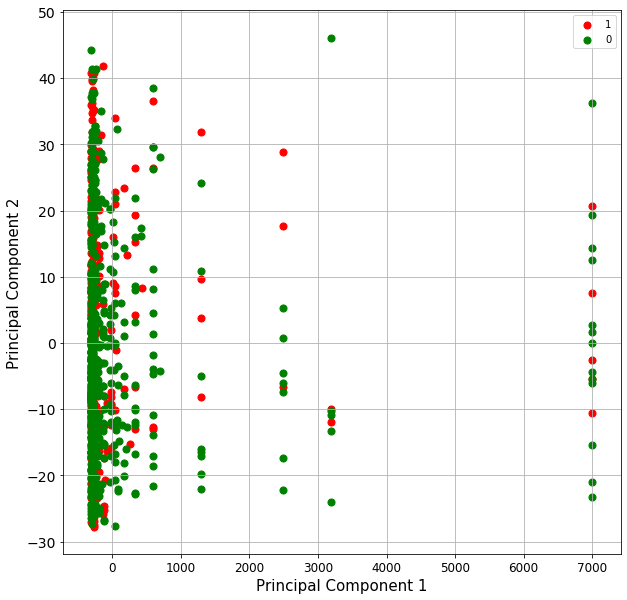

In [12]:

import matplotlib.pyplot as plt
plt.figure()
fig = plt.figure(figsize = (10,10))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
fails = [1,0]
colors = ['r', 'g']
for fail, color in zip(fails,colors):
    indicesToKeep = finalDf['fail'] == fail
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
plt.legend(fails)
plt.grid()

C:\Users\Harry\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

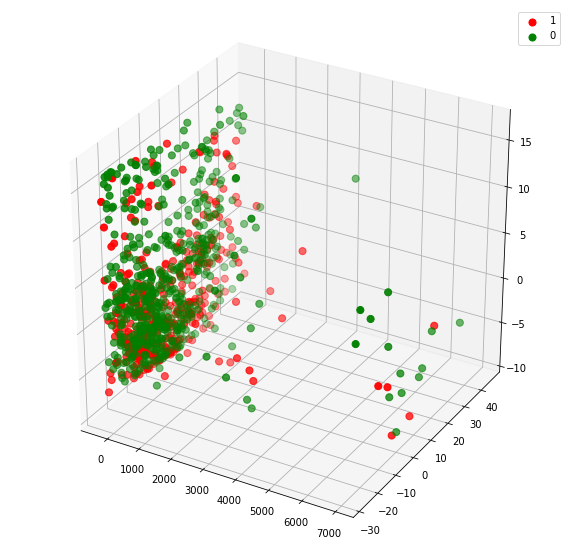

In [57]:
#plot 3d cloud 

#https://towardsdatascience.com/discover-3d-point-cloud-processing-with-python-6112d9ee38e7

import matplotlib.pyplot as plt
plt.figure()
fig = plt.figure(figsize = (10,10))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

ax = plt.axes(projection='3d')
#plt.xlabel('Principal Component 1', fontsize = 15)
#plt.ylabel('Principal Component 2', fontsize = 15)
#plt.zlabel('Principal Component 3', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
fails = [1,0]
colors = ['r', 'g']
for fail, color in zip(fails,colors):
    indicesToKeep = finalDf_3d['fail'] == fail
    ax.scatter(finalDf_3d.loc[indicesToKeep, 'principal component 1']
               , finalDf_3d.loc[indicesToKeep, 'principal component 2']
               , finalDf_3d.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
plt.legend(fails)
plt.grid()

In [13]:
finalDf

,principal component 1,principal component 2,fail
0,-306.373114,-10.422879,1
1,-116.361546,-26.710660,0
2,-275.363775,-22.457386,0
3,-223.366661,-18.634984,0
4,333.606850,21.825528,0
...,...,...,...
939,-306.399585,25.644809,1
940,-306.384504,2.697157,1
941,-306.379932,-4.548788,1
942,-306.382024,-1.364708,1


<Figure size 432x288 with 0 Axes>

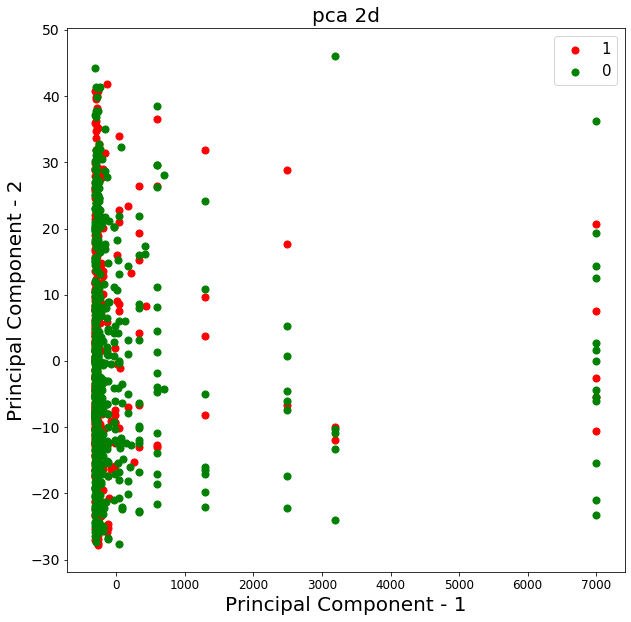

In [15]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("pca 2d",fontsize=20)
targets = [1, 0]
colors = ['r', 'g']
for fail, color in zip(targets,colors):
    indicesToKeep = df_iotdata['fail'] == fail
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show()

# filter dataframe
X=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

In [18]:
    nofailures_filter= df_iotdata['fail'] == 0
df_iotdata_noFailure= df_iotdata[nofailures_filter]


failures_filter= df_iotdata['fail'] == 1
df_iotdata_Failure= df_iotdata[failures_filter]

In [19]:
df_iotdata_Failure

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
12,190,2,5,4,6,5,22,4,1,1
18,33,7,6,2,6,5,51,4,1,1
23,0,7,6,1,6,6,44,4,2,1
34,640,7,7,5,7,4,33,3,3,1
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [20]:
df_iotdata_noFailure

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
5,110,3,3,4,6,1,21,4,1,0
...,...,...,...,...,...,...,...,...,...,...
925,0,0,3,4,4,0,48,6,24,0
928,59,7,4,2,6,2,70,3,24,0
929,0,0,3,3,4,2,39,3,24,0
933,27,7,4,4,7,2,46,3,24,0


# scatter plot failures 

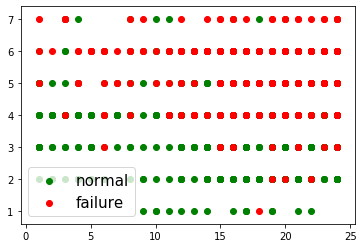

In [33]:
#scatter plot failure
plt.scatter(df_iotdata_noFailure["temp"],df_iotdata_noFailure["selfLR"],color="g")
plt.scatter(df_iotdata_Failure["temp"],df_iotdata_Failure["selfLR"],color="r")

col=["normal","failure"]
plt.legend(col,prop={'size': 15})

# correlation

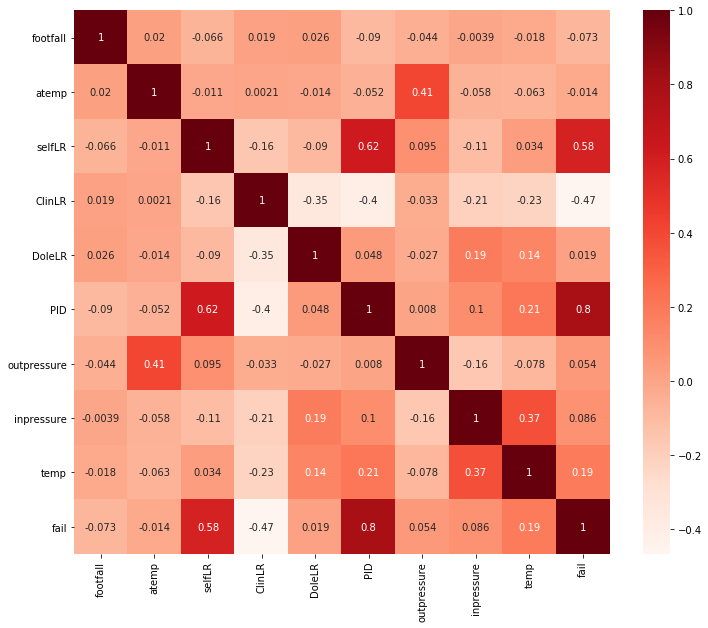

In [43]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b 

#feature corellation matrix
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_iotdata.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [47]:
#Correlation with output variable
cor_target = abs(cor["fail"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values(ascending=False)

fail      1.000000
PID       0.797329
selfLR    0.583238
ClinLR    0.466574
temp      0.190257
Name: fail, dtype: float64

In [50]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import